In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Add_sales_data_2018.csv')

In [3]:
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [4]:
data.shape

(205, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [6]:
data.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [7]:
data.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


# 1.Correlation of dataset

<AxesSubplot:>

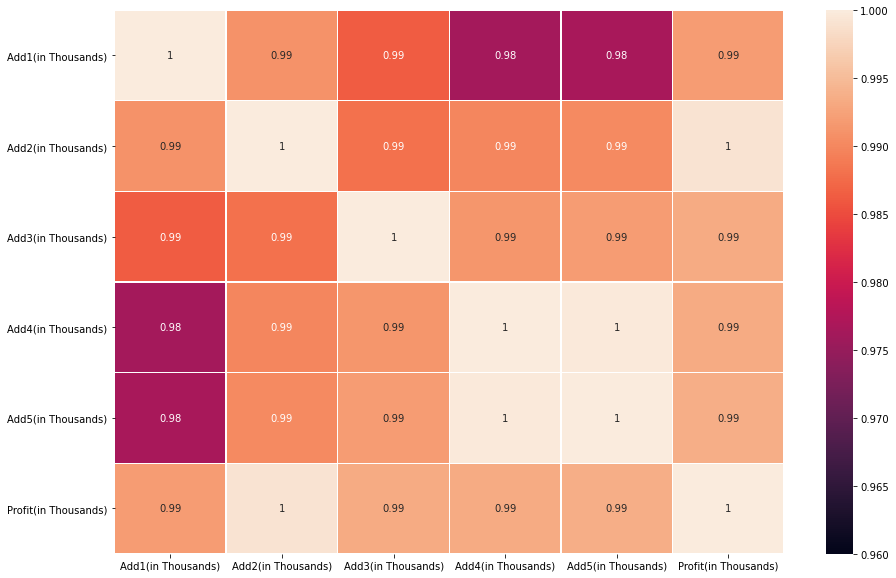

In [73]:
#relationship between the amount spent for advertising through five different companies and profit generated
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),vmin=0.96,vmax=1,annot=True,linewidth=0.4)

The data is highly correlated to each other

# 2. Building a regression model

In [81]:
y=data['Profit(in Thousands)']
x=data.drop(['Date'],axis=1)

In [82]:
#Fitting Simple Linear Regression to the Training set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
x_train.shape

(164, 5)

In [78]:
#Creating a linear regression modeland Predicting the profit of test set results
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
pred=model.predict(x_test)
pred

array([4152.066, 4446.441, 5131.898, 4907.56 , 5004.282, 4623.793,
       5384.175, 5328.025, 5175.051, 5956.323, 5780.799, 4997.719,
       5075.858, 5784.54 , 4936.12 , 5065.652, 4190.965, 5034.726,
       5015.536, 5134.657, 5145.131, 5421.94 , 4569.293, 4598.292,
       4436.321, 4175.677, 5616.791, 5667.25 , 4648.834, 5717.838,
       5001.615, 5182.368, 5017.503, 5545.013, 5013.207, 5030.451,
       5108.626, 4760.877, 4606.34 , 4925.861, 5250.788])

In [32]:
#Checking mean squared error
from sklearn.metrics import mean_squared_error
print('Mean Squared Error is:',mean_squared_error(y_test,pred))

Mean Squared Error is: 5.850789698545805e-25


In [33]:
#Reading regression coefficent
model.coef_

array([ 1.  , 12.38,  3.5 ,  1.  ,  0.9 ])

In [35]:
#Reading regression
model.intercept_

-1.8189894035458565e-12

In [66]:
# Checking R_squared value 
from sklearn.metrics import r2_score
print('R squared value is',r2_score(y_test,pred))

R squared value is 1.0


# 3.Prediction of profit with new amount spend for advertisement

In [60]:
amount=[[290,312,309,298,320]]
pred=model.predict(amount)
print('Prediction of profit with new amount spend for advertisement',pred)

Prediction of profit with new amount spend for advertisement [5820.06]


# Histogram of Frequency in profit and advertisements of sales

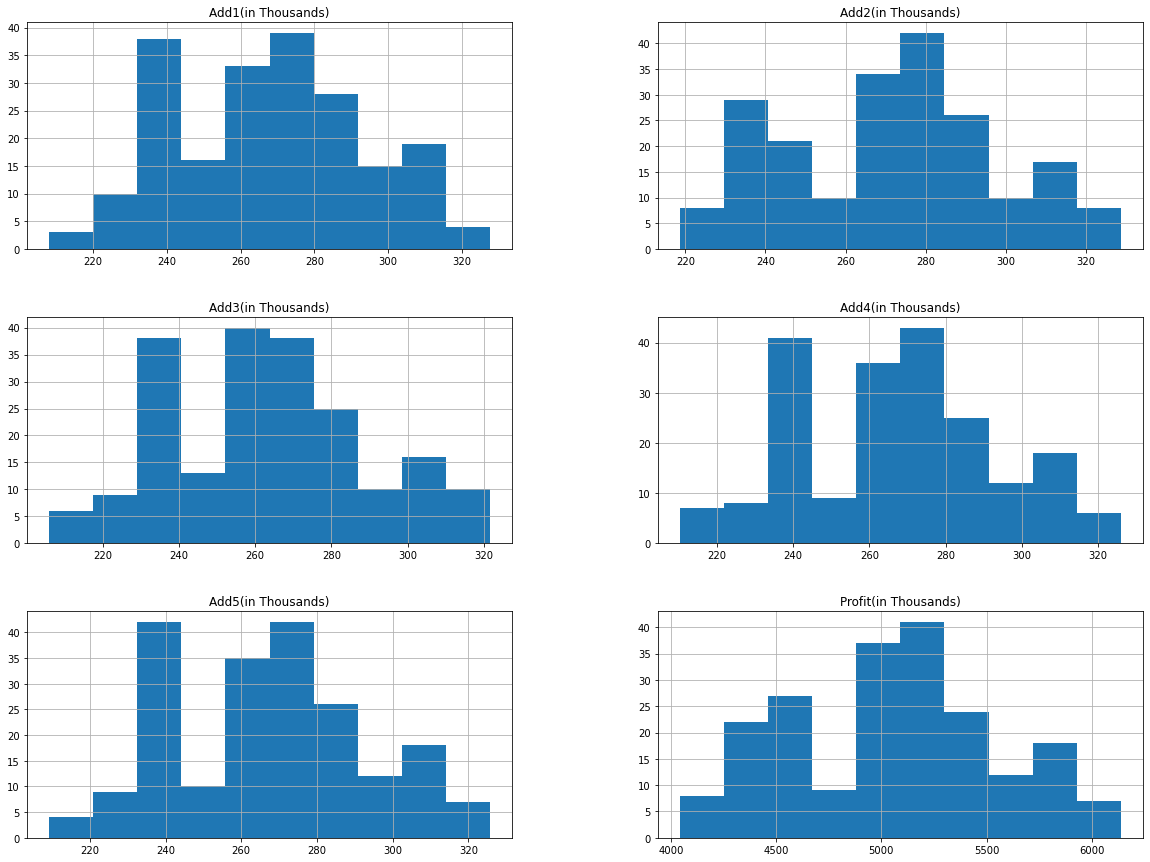

In [58]:
freq=data.select_dtypes(include=['int32','int64','float'])
freq.hist(figsize=(20,15))
plt.show()